<a href="https://colab.research.google.com/github/juango15/Proyecto-final-grupo5/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO FINAL<br>
RIEGO AUTOMATIZADO
#INTEGRANTES:<br>
Esteban Ruiz<br>
Luis Sierra<br>
Daniel Florez<br>



#**Idea inicial:**
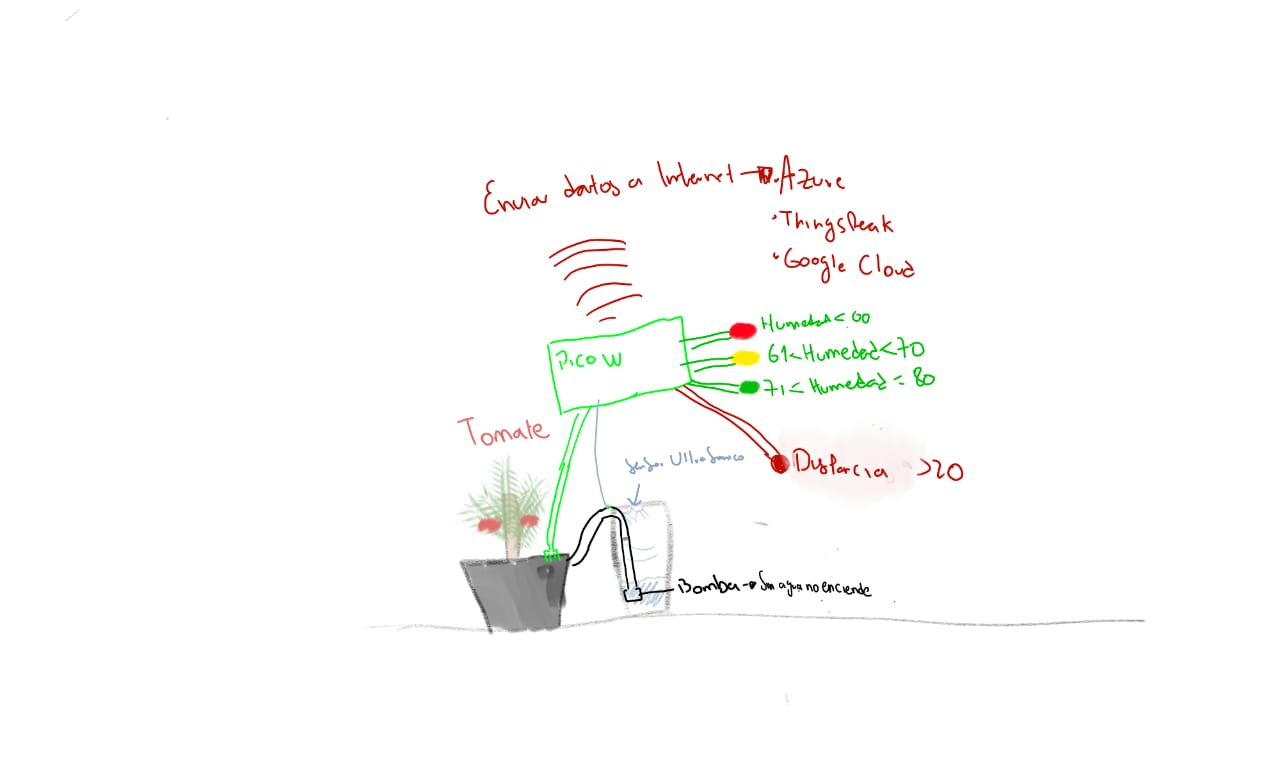

Diagrama esquemático

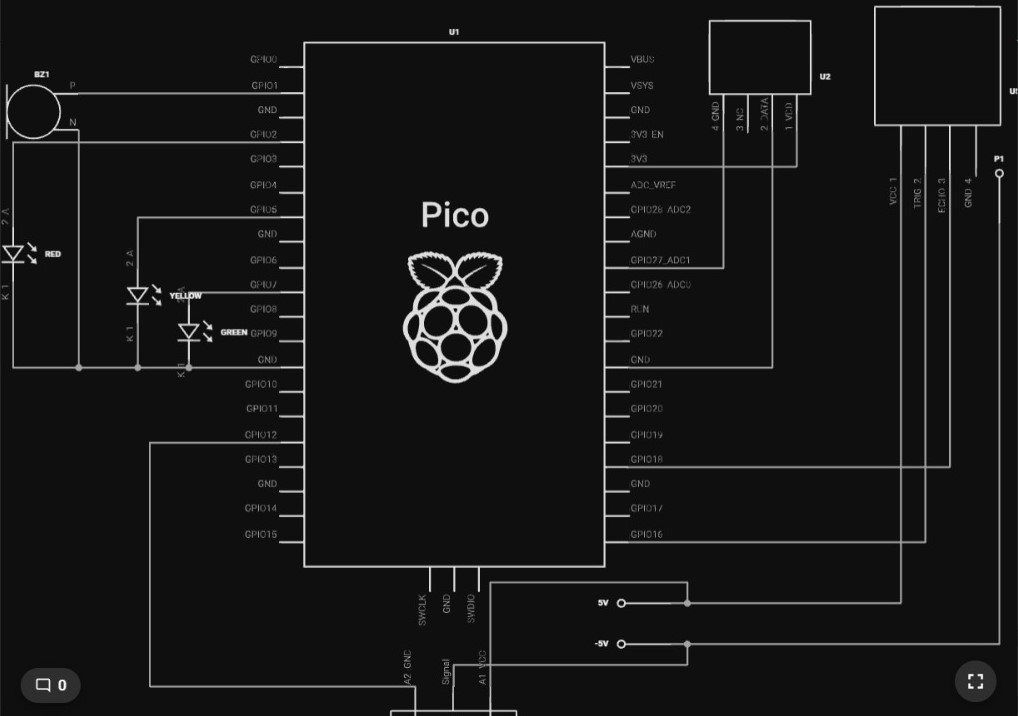
#**ANALISIS**:
Análisis detallado del problema y definición de requisitos del sistema de riego automatizado<br>
Problema:<br>
Desarrollar un sistema de riego automatizado para una planta que opere en función de la humedad del suelo y el nivel del agua en un recipiente de suministro de agua. El objetivo es mantener la planta hidratada de manera eficiente y evitar daños al sistema por falta de agua.
Componentes del sistema:<br>
•	Sensor de humedad del suelo: Mide la humedad del suelo y activa la motobomba cuando está por debajo de 60%<br>

Algoritmo
Inicio

    Importar módulos necesarios

    Conectar a la red WiFi utilizando las credenciales proporcionadas
    Imprimir "Conectado a WiFi"

    Inicializar una piscina de sockets para la conexión
    Inicializar una sesión de solicitudes HTTP

    Clase Humedad:
        Inicializar:
            Inicializar el sensor de humedad y los pines para los LED de los indicadores (rojo, amarillo, verde)
        Función humedad:
            Calcular el porcentaje de humedad basado en los valores del sensor
            Devolver el porcentaje de humedad
        Función set_leds:
            Asignar el estado de los LED según el porcentaje de humedad

    Clase Sensor de Distancia:
        Inicializar:
            Inicializar el sensor de distancia ultrasónico con los pines de disparo y eco
        Función get_distance:
            Intentar obtener la distancia medida por el sensor ultrasónico
            Si hay un error, imprimir "Reintentando"
            Devolver la distancia medida o Nulo si hay un error

    Clase Rele:
        Inicializar:
            Inicializar el pin para el relé
        Función alerta:
            Obtener la humedad y la distancia medidas por los sensores
            Si la humedad es baja y la distancia es menor a 10:
                Activar el modo de riego y el relé durante 5 segundos
                Imprimir mensajes de estado
            Si la humedad es baja pero la distancia es alta:
                Activar un LED rojo de alerta
            Si la humedad es suficiente:
                Desactivar el relé y el LED de alerta

    Clase Sistema de Sensores:
        Inicializar:
            Inicializar los objetos del sensor de distancia, el relé y el sensor de humedad
            Definir la URL de la API de Thingspeak para enviar datos
            Imprimir la URL de la API
        Función run:
            Llamar al método alerta del relé con los sensores y obtener la humedad y la distancia
            Imprimir los valores de humedad y distancia
            Devolver los valores de humedad y distancia
        Función write_data:
            Intentar enviar los datos de humedad y distancia a la nube a través de una solicitud POST
            Si hay un error de memoria, imprimir un mensaje de error

    Crear una instancia del Sistema de Sensores

    Definir una función iniciar:
        Ejecutar el método run del Sistema de Sensores y escribir los datos
    Programar tareas para ejecutar las funciones en intervalos específicos:
        Ejecutar iniciar cada 5 segundos
        Ejecutar la escritura de datos cada 10 segundos
    Ejecutar las tareas programadas en un bucle
    Imprimir "Código ejecutado correctamente"

Fin


#**Pseudocodigo:**

**Sistema de Sensores para Riego**

**Módulos**
  - WiFi
  - socketpool
  - adafruit_requests
  - rtc
  - adafruit_hcsr04
  - analogio
  - digitalio
  - circuitpython_schedule
  - adafruit_datetime
  - adafruit_ntp

**Constantes**
  - PIN_SENSOR_HUMEDAD = board.A1
  - PIN_LED_ROJO_HUMEDAD = board.GP2
  - PIN_LED_AMARILLO_HUMEDAD = board.GP4
  - PIN_LED_VERDE_HUMEDAD = board.GP7
  - PIN_SENSOR_DISTANCIA_TRIGGER = board.GP16
  - PIN_SENSOR_DISTANCIA_ECHO = board.GP18
  - PIN_RELE = board.GP12
  - PIN_LED_RELE = board.GP1
  - URL_THINGSPEAK = "https://api.thingspeak.com/update?api_key=29JOFUB3FGXQ4WKM"

**Clases**

**Humedad**
  - __init__:
    - sensor = analogio.AnalogIn(PIN_SENSOR_HUMEDAD)
    - led_rojo = digitalio.DigitalInOut(PIN_LED_ROJO_HUMEDAD)
      led_rojo.direction = digitalio.Direction.OUTPUT
    - led_amarillo = digitalio.DigitalInOut(PIN_LED_AMARILLO_HUMEDAD)
      led_amarillo.direction = digitalio.Direction.OUTPUT
    - led_verde = digitalio.DigitalInOut(PIN_LED_VERDE_HUMEDAD)
      led_verde.direction = digitalio.Direction.OUTPUT
  - humedad:
    - valor_sensor = sensor.value
    - humedad_porcentaje = ((60000 - valor_sensor) / (60000 - 300)) * 100
    - return humedad_porcentaje
  - set_leds:
    - if humedad_porcentaje is not None:
      - led_rojo.value = humedad_porcentaje < 60
      - led_amarillo.value = 60 <= humedad_porcentaje <= 70
      - led_verde.value = humedad_porcentaje > 70

**DistanceSensor**
  - __init__:
    - sensor = adafruit_hcsr04.HCSR04(trigger_pin=PIN_SENSOR_DISTANCIA_TRIGGER, echo_pin=PIN_SENSOR_DISTANCIA_ECHO)
  - get_distance:
    - try:
      - return sensor.distance
    - except RuntimeError:
      - print("Reintentando")
      - return None

**Rele**
  - __init__:
    - rele = digitalio.DigitalInOut(PIN_RELE)
      rele.direction = digitalio.Direction.OUTPUT
    - led_rele = digitalio.DigitalInOut(PIN_LED_RELE)
      led_rele.direction = digitalio.Direction.OUTPUT
  - set_led:
    - if distancia is not None:
      - led_rele.value = distancia > 18
  - alerta:
    - humedad = sensor_humedad.humedad()
    - distancia_sensor = sensor_distancia.get_distance()
    - print(f"Humedad: {humedad}")
    - if humedad < 60 and distancia_sensor is not None:
      - if distancia_sensor < 18:
        - print("La humedad en la tierra es baja\nIniciando modo de riego")
        - rele.rele.value = True
        - print("Modo del rele: activado")
        - time.sleep(5)
      - else:
        - print("Danger Reabastece el tanque de agua - nivel bajo")
        - sensor_humedad.led_rojo.value = True
    - else:
      - print("La humedad en la tierra es eficiente")
      - rele.rele.value = False
      - print("Modo del rele: desactivado")
    - sensor_humedad.set_leds(humedad)

**SensorSystem**
  - __init__:
    - sensor_distancia = DistanceSensor()
    - rele = Rele()
    - sensor_humedad = Humedad()

Fin


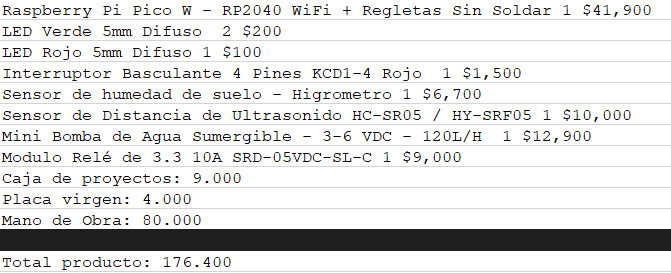

PROTOTIPO
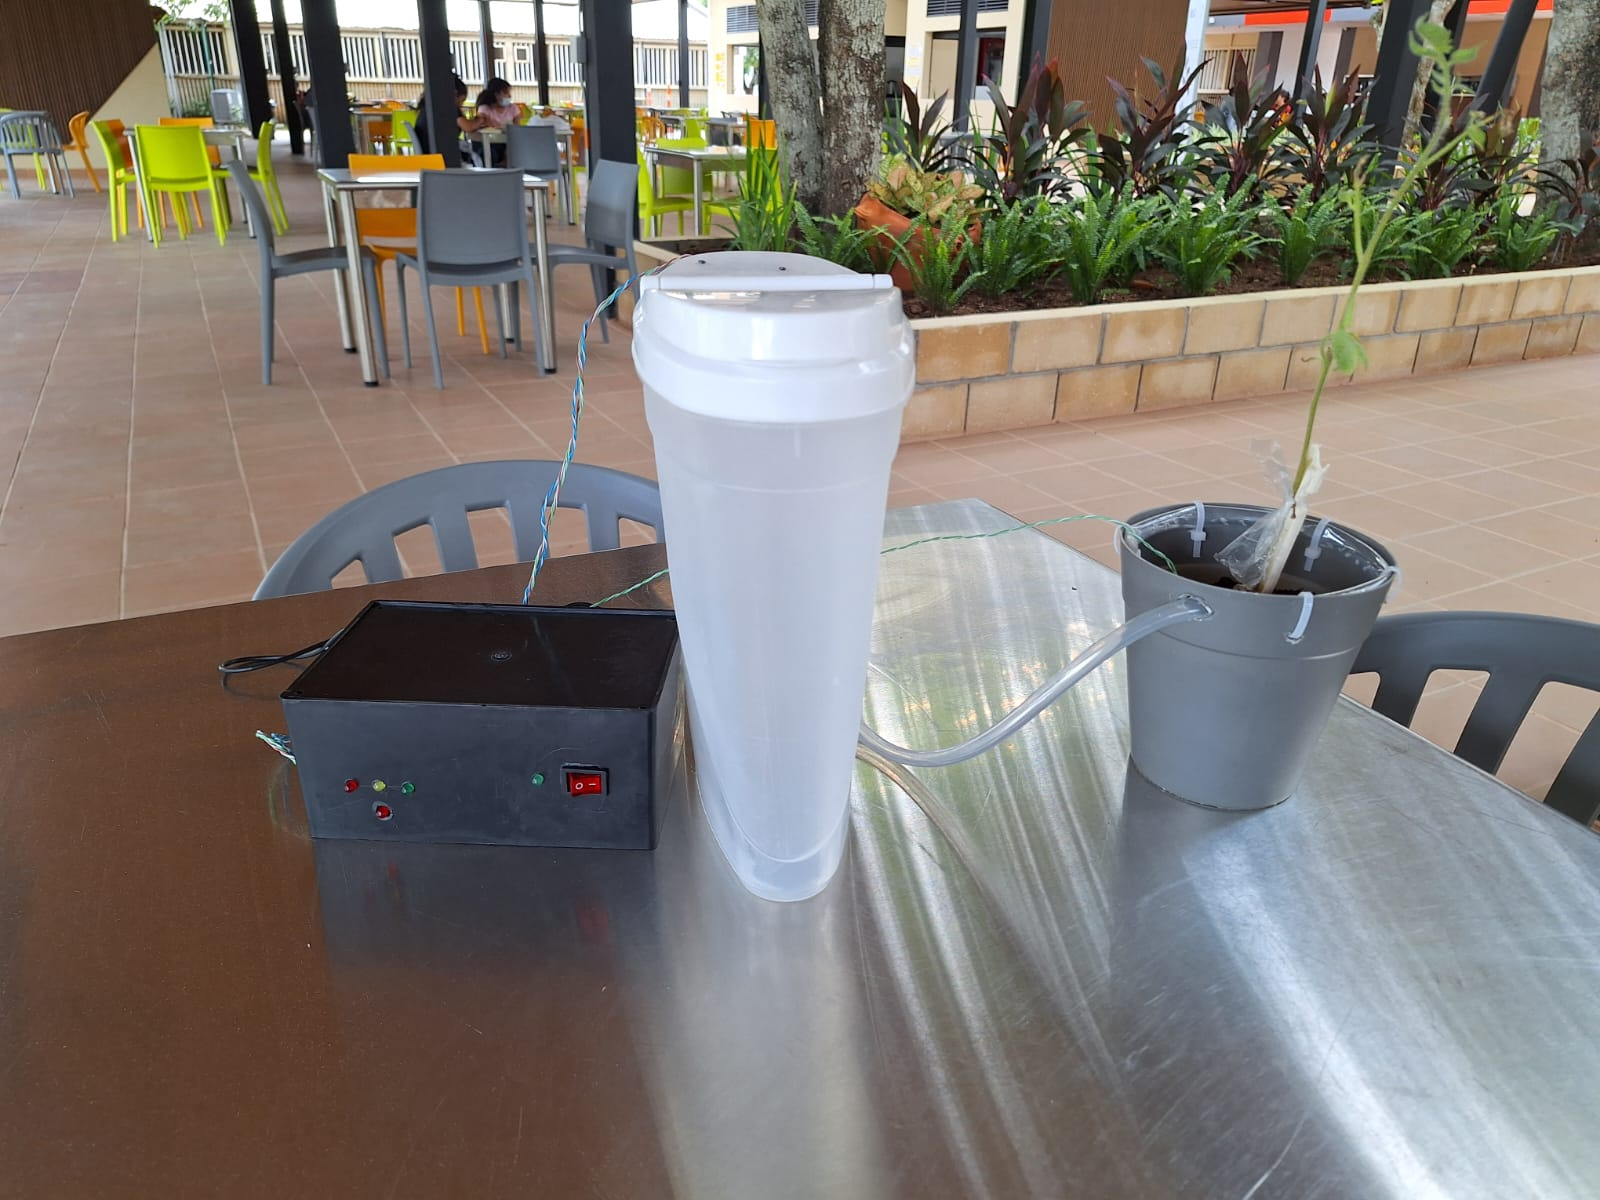

In [ ]:
#codigo:
import os
import time
import ssl
import wifi
import socketpool
import adafruit_requests
import rtc
import adafruit_hcsr04
import board
import analogio
import digitalio
import circuitpython_schedule as schedule
import adafruit_datetime as datetime
import adafruit_ntp

# Conectar a WiFi
wifi.radio.connect(os.getenv("WIFI_SSID"), os.getenv("WIFI_PASSWORD"))
print("Connected to WiFi")
pool = socketpool.SocketPool(wifi.radio)
requests = adafruit_requests.Session(pool, ssl.create_default_context())

class Humidity:
  def __init__(self, pin=board.A1, red_pin=board.GP2, yellow_pin=board.GP5, green_pin=board.GP7):
    self.sensor = analogio.AnalogIn(pin)
    self.red_led = digitalio.DigitalInOut(red_pin)
    self.red_led.direction = digitalio.Direction.OUTPUT
    self.yellow_led = digitalio.DigitalInOut(yellow_pin)
    self.yellow_led.direction = digitalio.Direction.OUTPUT
    self.green_led = digitalio.DigitalInOut(green_pin)
    self.green_led.direction = digitalio.Direction.OUTPUT

  def humedad(self):
    humidity_percentage = ((60000 - self.sensor.value) / (60000 - 300)) * 100
    return humidity_percentage

  def set_leds(self, humidity_percentage):
    if humidity_percentage is not None:
      self.red_led.value = humidity_percentage < 60
      self.yellow_led.value = 60 <= humidity_percentage <= 70
      self.green_led.value = humidity_percentage > 70

class DistanceSensor:
  def __init__(self, trigger_pin=board.GP16, echo_pin=board.GP18):
    self.sonar = adafruit_hcsr04.HCSR04(trigger_pin=trigger_pin, echo_pin=echo_pin)

  def get_distance(self):
    try:
      return self.sonar.distance
    except RuntimeError:
      print("Reintentando")
      return None

class Rele:
  def __init__(self, pin=board.GP12, red_pin=board.GP1):
    self.relay = digitalio.DigitalInOut(pin)
    self.relay.direction = digitalio.Direction.OUTPUT
    self.red_led = digitalio.DigitalInOut(red_pin)
    self.red_led.direction = digitalio.Direction.OUTPUT

  def set_led(self, sensor):
    if sensor is not None:
      self.red_led.value = sensor > 18

  def alerta(self, sensor, humidity_sensor, relay):
    humedad = humidity_sensor.humedad()
    distancia_sensor = sensor.get_distance()

    print(f"Humedad: {humedad}")
    if humedad < 60 and distancia_sensor is not None:
      if distancia_sensor < 19:
        print("La humedad en la tierra es baja\nIniciando modo de riego")
        relay.relay.value = True
        print("Modo del rele: activado")
        time.sleep(5)
      else:
        print("Danger Reabastece el tanque de agua - nivel bajo")
        humidity_sensor.red_led.value = True
    else:
      print("La humedad en la tierra es eficiente")
      relay.relay.value = False
      print("Modo del rele: desactivado")
    humidity_sensor.set_leds(humedad)

class SensorSystem:
  def __init__(self):
    self.sensor = DistanceSensor()
    self.rele = Rele()
    self.water = Humidity()
    self.url = "https://api.thingspeak.com/update?api_key=29JOFUB3FGXQ4WKM"
    print(f"Accessing url:\n{self.url}")

  def run(self):
    self.rele.alerta(self.sensor, self.water, self.rele)
    water2 = self.water.humedad()
    nivel = self.sensor.get_distance()
    print(f"Humedad: {water2}, Nivel: {nivel}")
    return water2, nivel

  def write_data(self, water2, nivel):
    try:
      respuesta = requests.post(self.url + "&field1=" + str(water2) + "&field2=" + str(nivel))
      respuesta.close()
      print("Datos guardados en la nube")
    except MemoryError:
      print("Error de memoria al intentar guardar datos en la nube")

# Crear una instancia de SensorSystem
sensor_system = SensorSystem()

# Definir funciones que llamen a los métodos correspondientes
def iniciar():
  water2, nivel = sensor_system.run()
  sensor_system.write_data(water2, nivel)

# Programar las tareas para ejecutar las funciones en tiempos diferentes
schedule.every(5).seconds.do(iniciar)
schedule.every(10).seconds.do(lambda: sensor_system.write_data(*sensor_system.run()))

# Ejecutar las tareas programadas en un bucle
while True:
  schedule.run_pending()
  time.sleep(1)

